In [1]:
import keras
# IMDB 리뷰 데이터셋 
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.imdb.load_data(num_words=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]), len(train_input[1]), len(train_input[2]))

218 189 141


In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
train_target[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [8]:
# 훈련세트, 검증세트 
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [10]:
# 단어 갯수의 분포로 가장 많이 분포가 되어 있는 단어 갯수를 파악
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(f"평균:{np.mean(lengths)}, 중앙값:{np.median(lengths)}, 최대:{np.max(lengths)}, 최소:{np.min(lengths)}")

평균:239.00925, 중앙값:178.0, 최대:1854, 최소:11


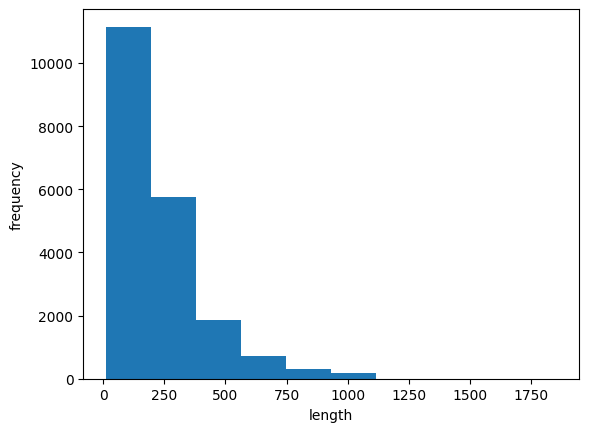

In [11]:
import matplotlib.pyplot as plt

plt.hist(lengths) # 히스토그램 그리기 : 수치의 빈도를 가지고 그래프를 그릴때 
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# 패딩 처리 - 학습 입력 데이터는 갯수가 동일!, 문장은 갯수가 동일하지 않다 - 동일하게 일정 갯수만큼 자른다.
# 어떤 문장은 기준보다 작을 수 있으므로 0으로 채워서 길이를 맞춰준다. 